<a href="https://www.kaggle.com/code/abdalrahmangomaa2805/handwashing-saves-lives-semmelweis-data-in-python?scriptVersionId=267996734" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
yearly = pd.read_csv('/kaggle/input/survey-data/yearly_deaths_by_clinic.csv')
monthly = pd.read_csv('/kaggle/input/survey-data/monthly_deaths.csv')
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
print(yearly.head())
print(monthly.head())

   year  births  deaths    clinic
0  1841    3036     237  clinic 1
1  1842    3287     518  clinic 1
2  1843    3060     274  clinic 1
3  1844    3157     260  clinic 1
4  1845    3492     241  clinic 1
         date  births  deaths
0  1841-01-01     254      37
1  1841-02-01     239      18
2  1841-03-01     277      12
3  1841-04-01     255       4
4  1841-05-01     255       2


In [3]:
# Check for missing
print("yearly" ,yearly.isnull().sum())
print("monthly", monthly.isnull().sum())

yearly year      0
births    0
deaths    0
clinic    0
dtype: int64
monthly date      0
births    0
deaths    0
dtype: int64


In [4]:
# Check for duplicated rows
print(yearly.duplicated().sum())
print(monthly.duplicated().sum())

0
0


In [5]:
yearly['proportion_deaths'] = (yearly["deaths"] / (yearly["deaths"] + yearly["births"])).round(2)
monthly['proportion_deaths'] = (monthly['deaths'] / (monthly['deaths'] + monthly['births'])).round(2)

In [6]:
# extract year and month
monthly['date'] = pd.to_datetime(monthly['date'])
monthly['year'] = monthly['date'].dt.year
monthly['month'] = monthly['date'].dt.month
monthly

,date,births,deaths,proportion_deaths,year,month
0,1841-01-01,254,37,0.13,1841,1
1,1841-02-01,239,18,0.07,1841,2
2,1841-03-01,277,12,0.04,1841,3
3,1841-04-01,255,4,0.02,1841,4
4,1841-05-01,255,2,0.01,1841,5
...,...,...,...,...,...,...
93,1848-11-01,310,9,0.03,1848,11
94,1848-12-01,373,5,0.01,1848,12
95,1849-01-01,403,9,0.02,1849,1
96,1849-02-01,389,12,0.03,1849,2


In [7]:
# Sort the monthly data by date
monthly.sort_values('date')
monthly

,date,births,deaths,proportion_deaths,year,month
0,1841-01-01,254,37,0.13,1841,1
1,1841-02-01,239,18,0.07,1841,2
2,1841-03-01,277,12,0.04,1841,3
3,1841-04-01,255,4,0.02,1841,4
4,1841-05-01,255,2,0.01,1841,5
...,...,...,...,...,...,...
93,1848-11-01,310,9,0.03,1848,11
94,1848-12-01,373,5,0.01,1848,12
95,1849-01-01,403,9,0.02,1849,1
96,1849-02-01,389,12,0.03,1849,2


In [8]:
# Create a new column handwashing_started
monthly['handwashing_started'] = np.where(monthly['date'] < '1847-01-01', 0, 1)

In [9]:
# Calculate the average proportion of deaths before and after handwashing
monthly_summary = monthly.groupby('handwashing_started')['proportion_deaths'].mean()
monthly_summary

handwashing_started
0    0.093662
1    0.028889
Name: proportion_deaths, dtype: float64

In [10]:
# Group the monthly dataset by year and calculate total births, deaths, and mean proportion of deaths.
yearly_summary = monthly.groupby('year').agg({
    'births' : 'sum',
    'deaths' : 'sum',
    'proportion_deaths' : 'mean'
})
yearly_summary

,births,deaths,proportion_deaths
year,,,
1841,2576,185,0.064545
1842,3067,521,0.145833
1843,2871,274,0.080000
1844,2918,260,0.080000
1845,3253,241,0.068333
1846,3352,459,0.120833
1847,3375,176,0.045000
1848,3556,45,0.011667
1849,1198,41,0.033333


In [11]:
merged = pd.merge(yearly, yearly_summary, on='year' , how='outer', suffixes=('_year','_total_month'))
merged

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,year,births_year,deaths_year,clinic,proportion_deaths_year,births_total_month,deaths_total_month,proportion_deaths_total_month
0,1841,3036.0,237.0,clinic 1,0.07,2576,185,0.064545
1,1841,2442.0,86.0,clinic 2,0.03,2576,185,0.064545
2,1842,3287.0,518.0,clinic 1,0.14,3067,521,0.145833
3,1842,2659.0,202.0,clinic 2,0.07,3067,521,0.145833
4,1843,3060.0,274.0,clinic 1,0.08,2871,274,0.080000
5,1843,2739.0,164.0,clinic 2,0.06,2871,274,0.080000
6,1844,3157.0,260.0,clinic 1,0.08,2918,260,0.080000
7,1844,2956.0,68.0,clinic 2,0.02,2918,260,0.080000
8,1845,3492.0,241.0,clinic 1,0.06,3253,241,0.068333
9,1845,3241.0,66.0,clinic 2,0.02,3253,241,0.068333


In [12]:
# Compare death proportions between Clinic 1 and Clinic 2.
clinic_compare = merged.groupby('clinic')['proportion_deaths_year'].mean().reset_index()
clinic_compare

,clinic,proportion_deaths_year
0,clinic 1,0.088333
1,clinic 2,0.038333


In [13]:
highest_mortality = clinic_compare.loc[clinic_compare['proportion_deaths_year'].idxmax()]
highest_mortality

clinic                    clinic 1
proportion_deaths_year    0.088333
Name: 0, dtype: object

In [14]:
# pivot table showing deaths by clinic and year.
pivot_deaths = merged.pivot_table(
    values = 'deaths_total_month',
    index = 'year',
    columns = 'clinic',
    aggfunc = 'sum'
)
pivot_deaths

clinic,clinic 1,clinic 2
year,,
1841,185,185
1842,521,521
1843,274,274
1844,260,260
1845,241,241
1846,459,459


In [15]:
import matplotlib.pyplot as plt

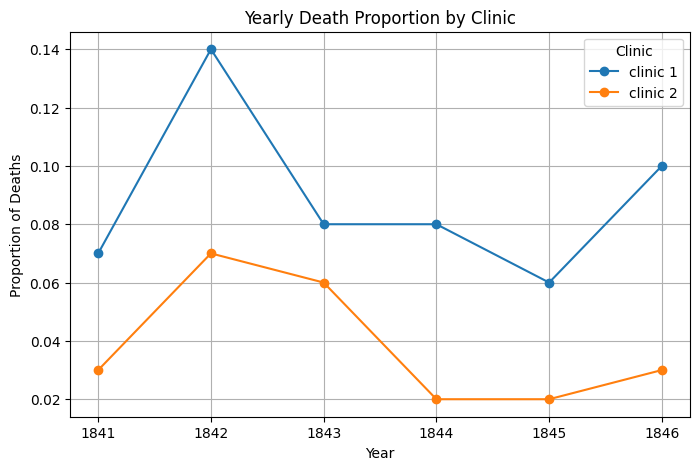

In [16]:
plt.figure(figsize=(8,5))
for clinic in yearly['clinic'].unique():
    subset = yearly[yearly['clinic'] == clinic]
    plt.plot(subset['year'], subset['proportion_deaths'], marker='o', label=clinic)

# Add labels and title
plt.title('Yearly Death Proportion by Clinic')
plt.xlabel('Year')
plt.ylabel('Proportion of Deaths')
plt.legend(title='Clinic')
plt.grid(True)
plt.show()

     clinic  deaths
0  clinic 1    1989
1  clinic 2     691


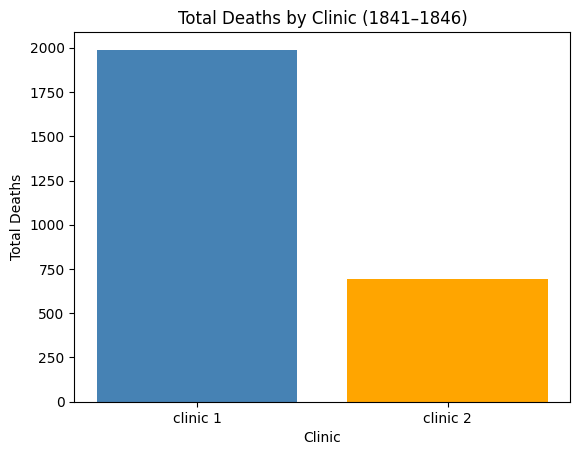

In [17]:
total_deaths = yearly.groupby('clinic')['deaths'].sum().reset_index()
print(total_deaths)
plt.bar(total_deaths['clinic'], total_deaths['deaths'], color=['steelblue', 'orange'])
plt.title('Total Deaths by Clinic (1841–1846)')
plt.xlabel('Clinic')
plt.ylabel('Total Deaths')
plt.show()

In [18]:
yearly_by_year = yearly.groupby('year')['proportion_deaths'].sum()
highest_year = yearly_by_year.idxmax()
highest_year

1842

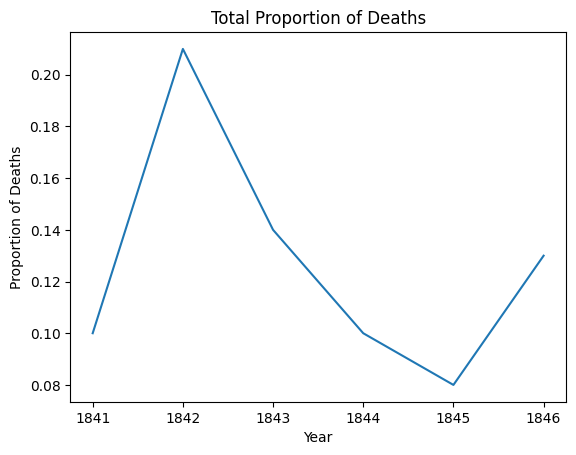

In [19]:
yearly_by_year = yearly.groupby('year')['proportion_deaths'].sum()
plt.plot(yearly_by_year.index, yearly_by_year.values)
plt.title('Total Proportion of Deaths')
plt.xlabel('Year')
plt.ylabel('Proportion of Deaths')
plt.show()

In [20]:
befor_washing = monthly[monthly['handwashing_started'] == 0]
after_washing = monthly[monthly['handwashing_started'] == 1]
befor_proportion = befor_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']

boot_mean_diff = []
for i in range(3000):
    boot_before = befor_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(boot_before.mean() -  boot_after.mean())
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025    0.047762
0.975    0.082661
dtype: float64